<a href="https://colab.research.google.com/github/mrpintime/Dota2_TI-2016/blob/main/Dota2Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dota2 TI 2016 Team Performance
Created by Mrpintime


# Dataset Description

Dota 2 is a popular computer game with two teams of 5 players. At the start of the game each player chooses a unique hero with different strengths and weaknesses. The dataset is reasonably sparse as only 10 of 113 possible heroes are chosen in a given game. All games were played in a space of 2 hours on the 13th of August, 2016

The data was collected using: https://gist.github.com/da-steve101/1a7ae319448db431715bd75391a66e1b


Each row of the dataset is a single game with the following features (in the order in the vector):
1. Team won the game (1 or -1)
2. Cluster ID (related to location)
3. Game mode (eg All Pick)
4. Game type (eg. Ranked)
5 - end: Each element is an indicator for a hero. Value of 1 indicates that a player from team '1' played as that hero and '-1' for the other team. Hero can be selected by only one player each game. This means that each row has five '1' and five '-1' values.

The hero to id mapping can be found here: https://github.com/kronusme/dota2-api/blob/master/data/heroes.json
Dataset Url: https://archive.ics.uci.edu/dataset/367/dota2+games+results

# Problem
We want to know can we predict winner of the games with these features and before end the game ?:)
and find out which hero has more impact on games ?
and find out which team did better but could not win the game ?

# Data Wrangling

Import necessary Libraries

In [1]:
import pandas as pd, seaborn as sns, numpy as np, matplotlib.pyplot as plt

**Note**: you can use high level libraries like Dataprep to do data cleaning and exploratory data analysis but i suggest you if you want to learn and be dominant on your data science knowledge use fundamental libraries like pandas, numpy and ...

Download dataset form UCI site

In [2]:
# ! curl https://archive.ics.uci.edu/static/public/367/dota2+games+results.zip --output dota2.zip

Save files on google drive to reuse them.

In [3]:
# !cp "/content/dota2.zip" "/content/drive/MyDrive/Dota2/"

In [4]:
# !unzip "/content/drive/MyDrive/Dota2/dota2.zip" -d "/content/drive/MyDrive/Dota2/"

So we saved our datasets to our drive google drive, as you can see we have to seperate dataset as test and train, we have to check them for data preprocessing.

## Data Cleaning

We need to import datasets and clean them.

In [5]:
df_trn = pd.read_csv('/content/drive/MyDrive/Dota2/dota2Train.csv')
df_tst = pd.read_csv('/content/drive/MyDrive/Dota2/dota2Test.csv')

In [6]:
df_trn.shape, df_tst.shape

((92649, 117), (10293, 117))

In [7]:
df_trn.isnull().sum().sum(), df_tst.isnull().sum().sum()

(0, 0)

Hoorayyyy, we do not have any null value in train and test set.

In [8]:
df_trn.head()

,-1,223,2,2.1,0,0.1,0.2,0.3,0.4,0.5,...,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102
0,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
3,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,1,122,2,3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1


> Column '-1' is for status of game or which team is winner at the end of the game.
---
> Column '223' is related to server location that two team play in it. [Link](https://github.com/kronusme/dota2-api/blob/master/data/regions.json)
---
> Column '2' is for game mode.   [Link](https://github.com/kronusme/dota2-api/blob/master/data/mods.json)
---
> Column '2.1' is for game type. [Link](https://github.com/kronusme/dota2-api/blob/master/data/lobbies.json)
---
> All other columns indicate a heros in the game. [Link](https://github.com/kronusme/dota2-api/blob/master/data/heroes.json)

In [9]:
df_trn.iloc[0, 4:].value_counts()

 0    103
 1      5
-1      5
Name: 0, dtype: int64

We can see as was in description each row contains 5 heros to one team and 5 to another team that indicate with 1 and -1 and all other heros value set to 0.  
in Overall we have 113 heros in game.  
You can see all heros here : [Link](https://github.com/kronusme/dota2-api/blob/master/data/heroes.json)   

In [10]:
# ['Won', 'Server', 'Game_mode', 'Game_type']+ hero_list

In [11]:
hero_list = [f'Hero_{i+1}' for i in range(113)]
new_columns_name = ['Won', 'Server', 'Game_mode', 'Game_type'] + hero_list

In [12]:
df_trn.columns = new_columns_name

In [13]:
df_trn.head()

,Won,Server,Game_mode,Game_type,Hero_1,Hero_2,Hero_3,Hero_4,Hero_5,Hero_6,...,Hero_104,Hero_105,Hero_106,Hero_107,Hero_108,Hero_109,Hero_110,Hero_111,Hero_112,Hero_113
0,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
3,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,1,122,2,3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1


Save dataset

In [95]:
# df_trn.to_csv('/content/drive/MyDrive/Dota2/preprocessed_train.csv', index=False)

**So we prepared our Dataset**

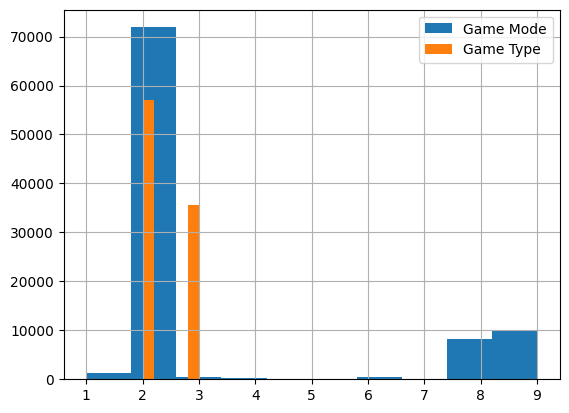

In [19]:
df_trn.Game_mode.hist(label='Game Mode')
df_trn.Game_type.hist(label='Game Type')
plt.legend()

The most ferquent Game type are `2:Tournament` and `3:Tutorial`.  
The most ferquent Game mode are `2:Captains Mode`, `8:Reverse Captains Mode` and `9:Greeviling Mode`

In [25]:
aug = df_trn.iloc[:, 4: ].abs().sum(axis=0)
aug

Hero_1      14973
Hero_2      20264
Hero_3       2524
Hero_4      11702
Hero_5      10050
            ...  
Hero_109     4513
Hero_110     3862
Hero_111     2637
Hero_112     3340
Hero_113     1791
Length: 113, dtype: int64

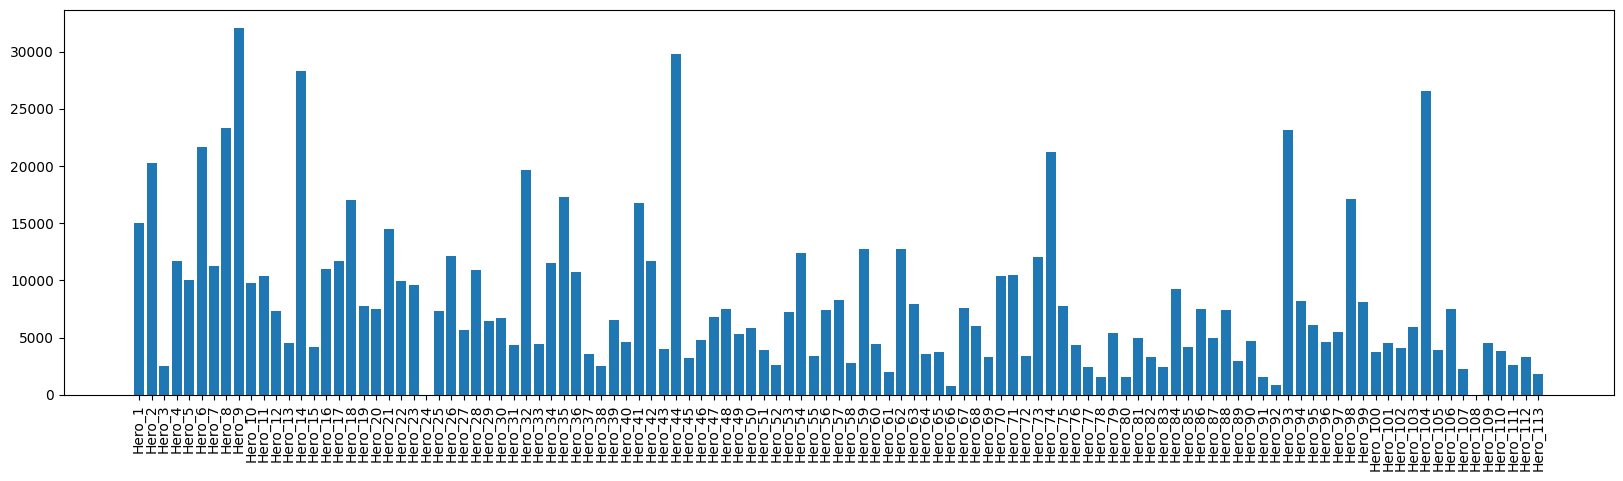

In [92]:
plt.figure(figsize=(20,5))
plt.bar(x=aug.index, height=aug)

plt.xticks(rotation=90)
plt.show()

In [46]:
mask = (aug.sort_values(ascending=False)/aug.sum() * 100) > 1

aug[mask].sort_values(ascending=False)

Hero_9      32048
Hero_44     29802
Hero_14     28284
Hero_104    26521
Hero_8      23327
Hero_93     23125
Hero_6      21700
Hero_74     21261
Hero_2      20264
Hero_32     19669
Hero_35     17276
Hero_98     17155
Hero_18     17028
Hero_41     16746
Hero_1      14973
Hero_21     14473
Hero_62     12717
Hero_59     12707
Hero_54     12361
Hero_26     12108
Hero_73     12069
Hero_4      11702
Hero_17     11688
Hero_42     11650
Hero_34     11558
Hero_7      11276
Hero_16     11013
Hero_28     10877
Hero_36     10729
Hero_71     10449
Hero_11     10410
Hero_70     10368
Hero_5      10050
Hero_22      9967
Hero_10      9806
Hero_23      9635
dtype: int64

In [47]:
aug[aug==0]

Hero_24     0
Hero_108    0
dtype: int64

AS you can see we should remove these two columns.

In [48]:
df_trn.drop(columns=['Hero_24', 'Hero_108'], inplace=True)

In [66]:
def calc_win_rate(hero):
  all = df_trn[df_trn[f'Hero_{hero}'] != 0].loc[:, ['Won', f'Hero_{hero}']]
  all_game = all.shape[0]
  wins = 0
  for i,(w,s) in all.iterrows():
    if w == s:
      wins += 1
  # print('Win_Rate = ', (wins/all_game)*100)
  return np.round((wins/all_game)*100, 2)

print(calc_win_rate('113'))

43.33


In [67]:
win_rate = dict()
cls = df_trn.iloc[:, 4:].columns
for c in cls:
  q = c.split('_')[1]
  win_rate[f'Hero_{q}'] = calc_win_rate(f'{q}')

In [73]:
win_rate_df = pd.DataFrame(win_rate, index = [0])

In [75]:
win_rate_df

,Hero_1,Hero_2,Hero_3,Hero_4,Hero_5,Hero_6,Hero_7,Hero_8,Hero_9,Hero_10,...,Hero_103,Hero_104,Hero_105,Hero_106,Hero_107,Hero_109,Hero_110,Hero_111,Hero_112,Hero_113
0,46.7,52.7,45.01,50.75,54.77,53.47,50.16,50.44,55.32,50.15,...,58.57,48.71,47.48,42.17,42.61,48.81,51.27,43.42,44.64,43.33


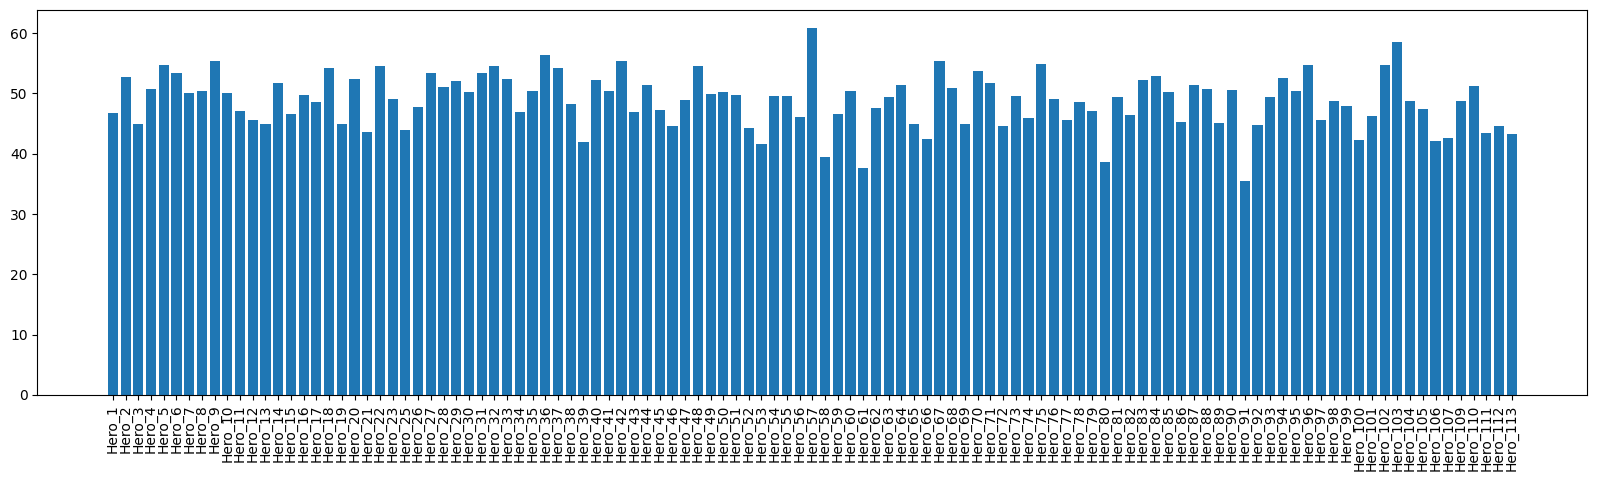

In [87]:
plt.figure(figsize=(20,5))
plt.bar(x=win_rate_df.columns, height=win_rate_df.values[0])

plt.xticks(rotation=90)
plt.show()

In [93]:
df_trn[df_trn['Hero_57'] != 0].shape, df_trn[df_trn['Hero_113'] != 0].shape

((8320, 115), (1791, 115))

So as you can see here `Hero_91` has **lowest win rate** unless name of the hero is `Wisp` and with a few search we can find out that **pro player** pick this hero **more** than number we saw here and also this hero has **higher win rate**.

---

> So here in this dataset we have all games in 2016 and this is not just pro players games (TI event), this is also include other players game such as public games in 2016.

> One thing else is if we assume this data set is just for TI event we have to have much less game rather than we see here in this data set.

In [106]:
mask = df_trn.Server.value_counts(normalize=True) * 100 > 2
df_trn.Server.value_counts()[mask]

227    7874
154    7013
156    6899
151    6848
153    6757
152    6715
155    6611
224    5963
231    3666
223    3500
225    2643
Name: Server, dtype: int64

As we saw above results we see that 154 and 156 are one of the top servers but if we look at api of server we see both of them are for one specific region.
So we need some prepration on `Server` column.

In [108]:
regions= [
        {
            "id" : 111,
            "name" : "US West"
        },
        {
            "id" : 112,
            "name" : "US West"
        },
        {
            "id" : 113,
            "name" : "US West"
        },
        {
            "id" : 114,
            "name" : "US West"
        },
        {
            "id" : 121,
            "name" : "US East"
        },
        {
            "id" : 122,
            "name" : "US East"
        },
        {
            "id" : 123,
            "name" : "US East"
        },
        {
            "id" : 124,
            "name" : "US East"
        },
        {
            "id" : 131,
            "name" : "Europe West"
        },
        {
            "id" : 132,
            "name" : "Europe West"
        },
        {
            "id" : 133,
            "name" : "Europe West"
        },
        {
            "id" : 134,
            "name" : "Europe West"
        },
        {
            "id" : 135,
            "name" : "Europe West"
        },
        {
            "id" : 136,
            "name" : "Europe West"
        },
        {
            "id" : 137,
            "name" : "Europe West"
        },
        {
            "id" : 138,
            "name" : "Europe West"
        },
        {
            "id" : 142 ,
            "name" : "South Korea"
        },
        {
            "id" : 143,
            "name" : "South Korea"
        },
        {
            "id" : 144,
            "name" : "South Korea"
        },
        {
            "id" : 145,
            "name" : "South Korea"
        },
        {
            "id" : 151 ,
            "name" : "Southeast Asia"
        },
        {
            "id" : 152,
            "name" : "Southeast Asia"
        },
        {
            "id" : 153,
            "name" : "Southeast Asia"
        },
        {
            "id" : 154,
            "name" : "Southeast Asia"
        },
        {
            "id" : 155,
            "name" : "Southeast Asia"
        },
        {
            "id" : 156,
            "name" : "Southeast Asia"
        },
        {
            "id" : 161,
            "name" : "China"
        },
        {
            "id" : 163,
            "name" : "China"
        },
        {
            "id" : 171,
            "name": "Australia"
        },
        {
            "id" : 181,
            "name" : "Russia"
        },
        {
            "id" : 182,
            "name" : "Russia"
        },
        {
            "id" : 183,
            "name" : "Russia"
        },
        {
            "id" : 184,
            "name" : "Russia"
        },
        {
            "id" : 185,
            "name" : "Russia"
        },
        {
            "id" : 186,
            "name" : "Russia"
        },
        {
            "id" : 187,
            "name" : "Russia"
        },
        {
            "id" : 188,
            "name" : "Russia"
        },
        {
            "id" : 191,
            "name" : "Europe East"
        },
        {
            "id" : 192,
            "name" : "Europe East"
        },
        {
            "id" : 200,
            "name" : "South America"
        },
        {
            "id" : 202,
            "name" : "South America"
        },
        {
            "id" : 203,
            "name" : "South America"
        },
        {
            "id" : 204,
            "name" : "South America"
        },
        {
            "id" : 211,
            "name" : "South Africa"
        },
        {
            "id" : 212,
            "name" : "South Africa"
        },
        {
            "id" : 213,
            "name" : "South Africa"
        },
        {
            "id" : 221,
            "name" : "China"
        },
        {
            "id" : 222,
            "name" : "China"
        },
        {
            "id" : 223,
            "name" : "China"
        },
        {
            "id" : 224,
            "name" : "China"
        },
        {
            "id" : 225,
            "name" : "China"
        },
        {
            "id" : 227,
            "name" : "China"
        },
        {
            "id" : 231,
            "name" : "China"
        },
        {
            "id" : 241,
            "name" : "Chile"
        },
        {
            "id" : 242,
            "name" : "Chile"
        },
        {
            "id" : 251,
            "name" : "Peru"
        },
        {
            "id" : 261,
            "name" : "India"
        }
    ]

In [128]:
server_name = []
server_encode = []
for i in regions:
  server_name.append(i['name'])
  server_encode.append(i['id'])

In [134]:
for i in np.unique(df_trn.Server):
  if i in server_encode:
    pass
  else:
    print(i)

232


We can see Server 232 is not in our region list, so we name it Unknown server.

In [141]:
reg_server = []
for i in df_trn.Server:
  for x, y in zip(server_name, server_encode):
    if i == y:
      reg_server.append(x)
      break
    elif i == 232:
      reg_server.append('Unknown')
      break

In [142]:
len(reg_server), df_trn.Server.shape

(92649, (92649,))

In [143]:
df_trn['Region'] = reg_server

In [154]:
# re-arrange columns
new_heros = df_trn.iloc[0,4:-1].index.to_list()
cls = ['Won', 'Region', 'Server', 'Game_mode', 'Game_type'] + new_heros

# save a original copy
orig_df = df_trn.copy()

df_trn = df_trn[cls]

<Axes: >

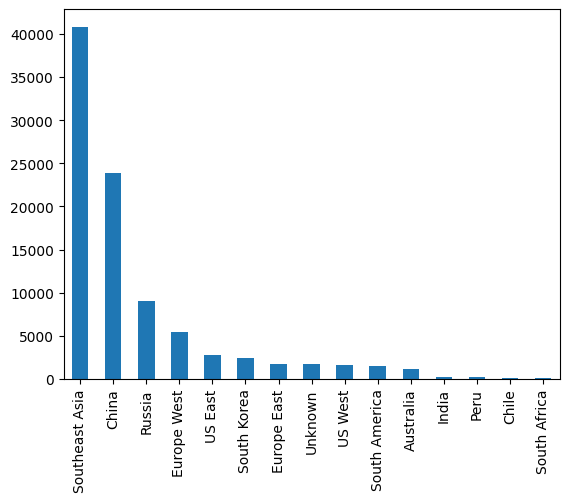

In [156]:
df_trn.Region.value_counts().plot.bar()

As we can see the most server usage is `Southeast Asia`
and we a few search we find out that in 2016 and 2017 we had 16 server that i listed below:
> Southeast Asia, China, Russia, Europe West, US East, South Korea, Europe East, `Japan`, `Dubai`, US West, South America, Australia, India, Peru, Chile, South Africa.  

One thing else i think worth nothing to say is we have `Unknown` server in our dataset and we think some of `Unknown` servers are `Japan` and some others are `Dubai`.  